In [2]:
#!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
from datetime import date 
import matplotlib.pyplot as plt
import numpy as np

In [38]:
today = date.today()

In [6]:
cik_ticker = pd.read_csv('CIK-TICKER.csv')

In [30]:
stocks_left = pd.read_pickle('stocks_left.pkl')

In [43]:
stocks_left.columns = ['Stock_list']

In [57]:
stocks_left = stocks_left.astype({'Stock_list': 'int64'})

In [58]:
stocks_left.dtypes

Stock_list    int64
dtype: object

In [59]:
cik_ticker.dtypes

CIK        int64
Symbol    object
Name      object
dtype: object

In [60]:
mer = cik_ticker.merge(stocks_left,left_on = 'CIK',right_on='Stock_list',how = 'right')

In [66]:
ticker_list = list(mer['Symbol'])

In [68]:
data = yf.download(ticker_list, start="2007-01-01", end=today)

[*********************100%***********************]  431 of 431 completed


In [106]:
close_data = data['Adj Close']

In [93]:
close_data.reset_index(inplace=True)

In [109]:
(close_data.pct_change())

,A,AAPL,ABMD,ACAD,ACC,ACM,ADS,ADSK,AES,AGCO,...,WWD,XEL,XLNX,XLRN,XOM,XRAY,XRX,Y,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.003207,0.022196,0.021352,-0.014823,0.008621,NaN,0.008430,0.018984,0.000456,-0.022442,...,0.011681,0.000854,0.023719,NaN,-0.018756,0.003001,-0.000591,-0.018170,-0.005734,0.004462
2007-01-05,-0.009300,-0.007121,-0.014634,-0.039352,-0.011624,NaN,0.000929,0.014517,-0.028702,-0.010129,...,-0.029117,-0.020043,-0.009102,NaN,0.007150,0.000000,-0.009473,-0.016039,-0.010092,-0.003002
2007-01-08,-0.003520,0.004938,-0.002122,-0.027711,-0.003113,NaN,-0.001856,-0.003100,-0.014072,-0.004775,...,0.010082,0.000000,0.006263,NaN,-0.008056,0.005651,0.016737,-0.001811,0.002039,0.001687
2007-01-09,0.001178,0.083070,-0.010631,-0.021066,0.021513,NaN,0.017354,0.012440,-0.040913,0.004798,...,-0.002047,-0.000435,-0.004564,NaN,-0.007709,0.000331,-0.002940,-0.000698,-0.001744,0.005530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07,0.003386,-0.022736,-0.013207,-0.020628,0.008386,0.005743,0.018764,-0.030094,0.036858,0.006003,...,0.038064,0.031954,-0.011044,-0.068946,-0.004583,0.048544,0.025076,0.038686,-0.012869,0.037458
2020-08-10,-0.006545,0.014535,-0.034747,-0.033700,0.005162,0.008046,0.024702,-0.018456,0.025058,0.025324,...,0.047359,0.001521,-0.009399,-0.035311,0.024632,0.000882,0.063842,0.044546,-0.009292,0.026931
2020-08-11,-0.008647,-0.029740,-0.017166,-0.025672,-0.011127,0.010299,0.034257,-0.013326,-0.034679,0.038325,...,0.020650,-0.026639,-0.017285,-0.028655,0.010335,0.009031,-0.007852,-0.016125,0.000571,0.019885


In [94]:
close_data['Year-Week'] = close_data['Date'].dt.strftime('%Y-%U')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
new_close = close_data.drop('Date',axis = 'columns')

In [112]:
new_closee

In [114]:
change = new_close.pct_change()

In [115]:
g = change.groupby(change.index)

In [117]:
week_ret = g.apply(lambda x: (x+1).cumprod())

In [120]:
week_ret

,A,AAPL,ABMD,ACAD,ACC,ACM,ADS,ADSK,AES,AGCO,...,WWD,XEL,XLNX,XLRN,XOM,XRAY,XRX,Y,ZBRA,ZION
Year-Week,,,,,,,,,,,,,,,,,,,,,
2007-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-00,1.003207,1.022196,1.021352,0.985177,1.008621,NaN,1.008430,1.018984,1.000456,0.977558,...,1.011681,1.000854,1.023719,NaN,0.981244,1.003001,0.999409,0.981830,0.994266,1.004462
2007-00,0.993878,1.014916,1.006406,0.946408,0.996897,NaN,1.009366,1.033777,0.971741,0.967657,...,0.982225,0.980794,1.014401,NaN,0.988261,1.003001,0.989941,0.966083,0.984232,1.001447
2007-01,0.996480,1.004938,0.997878,0.972289,0.996887,NaN,0.998144,0.996900,0.985928,0.995225,...,1.010082,1.000000,1.006263,NaN,0.991944,1.005651,1.016737,0.998189,1.002039,1.001687
2007-01,0.997653,1.088419,0.987270,0.951807,1.018333,NaN,1.015465,1.009301,0.945591,1.000000,...,1.008014,0.999565,1.001670,NaN,0.984298,1.005984,1.013748,0.997492,1.000291,1.007227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-31,1.015052,1.047552,1.036274,1.027905,0.991693,1.064659,1.040352,0.999196,1.126724,1.046930,...,1.073525,1.047798,1.001025,0.999496,1.032319,1.017040,1.006607,1.033217,1.008157,1.040653
2020-32,0.993455,1.014535,0.965253,0.966300,1.005162,1.008046,1.024702,0.981544,1.025058,1.025324,...,1.047359,1.001521,0.990601,0.964689,1.024632,1.000882,1.063842,1.044546,0.990708,1.026931
2020-32,0.984864,0.984363,0.948684,0.941493,0.993978,1.018427,1.059805,0.968464,0.989510,1.064619,...,1.068987,0.974841,0.973479,0.937046,1.035221,1.009921,1.055489,1.027702,0.991273,1.047351


In [133]:
target= list(week_ret.index)
prev_x = target[0]
target_index = []
i = 1
for x in target:
    if x == prev_x:
        target_index.append(0)
        continue
    else:
        target_index.append(i)
        i += 1
    prev_x = x
target_index[0] = i
target_index = np.roll(target_index,-1)



In [136]:
week_ret['target'] = target_index

In [140]:
final_ret = week_ret[week_ret['target']!=0]

In [142]:
final_ret.drop('target',axis = 'columns',inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
final_ret.to_csv('Final_Returns.csv')

In [118]:
change.to_csv('changes.csv')

In [119]:
week_ret.to_csv('week_ret.csv')

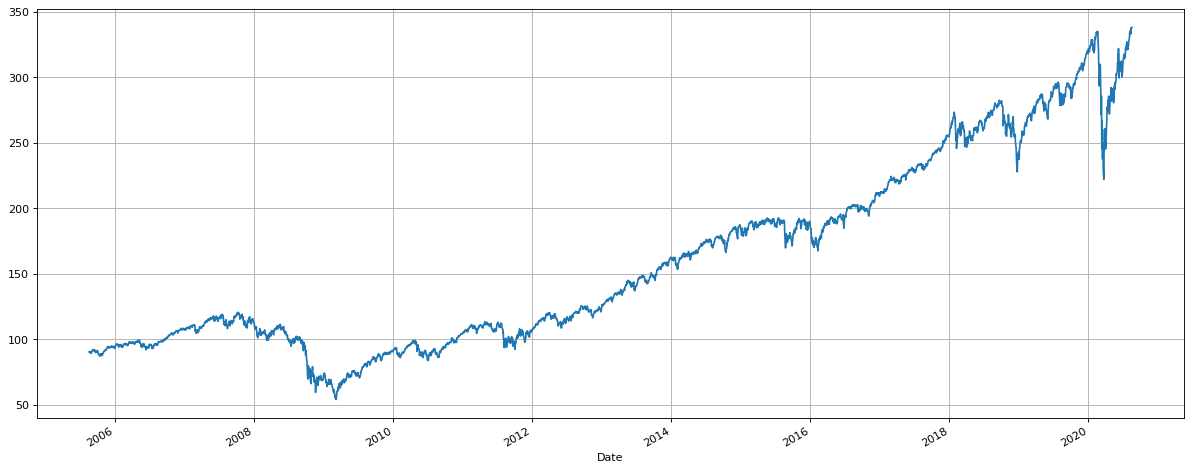

In [4]:
ticker = yf.Ticker("SPY")
data = ticker.history(period = "15y", interval = "1d")

# Sort the dataframe according to the date
data.sort_values('Date', inplace=True, ascending=True)

# Print the dataframe top
data.head()

# Visualization of data. Plotting the price close.
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
data['Close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

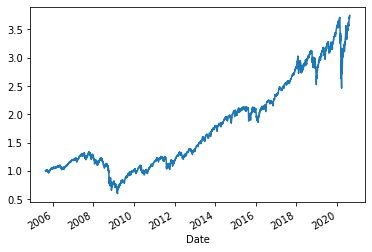

In [10]:
(data['Close'].pct_change() + 1).cumprod().plot()